# J2118 SED analysis

In [1]:
import os, time, pdb
import numpy as np

In [2]:
from hizea.prospector import load_sps, load_obs, load_model, max_likelihood

#### Plotting preferences

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.8, palette='Set2')
%matplotlib inline

In [4]:
seed = 1

### Load the SPS models, just once.

In [5]:
%time sps = load_sps()

CPU times: user 13.1 s, sys: 1.21 s, total: 14.3 s
Wall time: 14.6 s


### Read the photometry and filter curves into a dictionary.

In [6]:
obs, run_params = load_obs()
obs

{'redshift': 0.535,
 'filters': [<class 'sedpy.observate.Filter'>(galex_FUV),
  <class 'sedpy.observate.Filter'>(galex_NUV),
  <class 'sedpy.observate.Filter'>(sdss_u0),
  <class 'sedpy.observate.Filter'>(sdss_g0),
  <class 'sedpy.observate.Filter'>(sdss_r0),
  <class 'sedpy.observate.Filter'>(sdss_i0),
  <class 'sedpy.observate.Filter'>(sdss_z0),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch1),
  <class 'sedpy.observate.Filter'>(spitzer_irac_ch2),
  <class 'sedpy.observate.Filter'>(wise_w1),
  <class 'sedpy.observate.Filter'>(wise_w2),
  <class 'sedpy.observate.Filter'>(wise_w3),
  <class 'sedpy.observate.Filter'>(wise_w4)],
 'maggies': array([1.82491e-09, 8.06441e-09, 1.27666e-08, 1.59991e-08, 3.15573e-08,
        3.63049e-08, 4.14564e-08, 9.25971e-08, 9.67009e-08, 9.40651e-08,
        1.02882e-07, 5.44324e-07, 1.38524e-06]),
 'maggies_unc': array([2.94736581e-10, 2.10368802e-10, 8.07610601e-10, 3.65778541e-10,
        6.76050781e-10, 8.06144963e-10, 1.92021365e-09, 1.59745020e-

### Specify the prior model from among the available templates.

In [7]:
from prospect.models.templates import TemplateLibrary
TemplateLibrary.show_contents()

'type_defaults':
  Explicitly sets dust amd IMF types.
'ssp':
  Basic set of (free) parameters for a delta function SFH
'parametric_sfh':
  Basic set of (free) parameters for a delay-tau SFH.
'dust_emission':
  The set of (fixed) dust emission parameters.
'nebular':
  The set of nebular emission parameters, with gas_logz tied to stellar logzsol.
'agn':
  The set of (fixed) AGN dusty torus emission parameters.
'igm':
  The set of (fixed) IGM absorption parameters.
'spectral_smoothing':
  Set of parameters for spectal smoothing.
'optimize_speccal':
  Set of parameters (most of which are fixed) for optimizing a polynomial calibration vector.
'fit_speccal':
  Set of parameters (most of which are free) for sampling the coefficients of a polynomial calibration vector.
'burst_sfh':
  The set of (fixed) parameters for an SF burst added to a parameteric SFH, with the burst time controlled by `fage_burst`.
'logm_sfh':
  Non-parameteric SFH fitting for log-mass in fixed time bins
'continuity_sfh'

In [9]:
TemplateLibrary.describe('burst_sfh')

Free Parameters: (name: prior) 
-----------
  

Fixed Parameters: (name: value [, depends_on]) 
-----------
  tburst: 0.0 <function tburst_from_fage at 0x15db4f6a8>
  fburst: 0.0 
  fage_burst: 0.0 


In [18]:
TemplateLibrary.describe('parametric_sfh')

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=0.1,maxi=30)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: 0.1 
  sfh: 4 
  imf_type: 2 
  dust_type: 0 


In [7]:
model = load_model('delayed-tau', redshift=obs['redshift'])
model.theta_labels

<bound method ProspectorParams.theta_labels of :::::::
<class 'prospect.models.sedmodel.SedModel'>

Free Parameters: (name: prior) 
-----------
  mass: <class 'prospect.models.priors.LogUniform'>(mini=10000000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-1.0,maxi=0.3)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.LogUniform'>(mini=0.001,maxi=10)
  tau: <class 'prospect.models.priors.LogUniform'>(mini=1,maxi=100.0)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  zred: 0.535 
  sfh: 4 
  imf_type: 2 
  dust_type: 0 
  add_dust_emission: True 
  duste_umin: 1.0 
  duste_qpah: 4.0 
  duste_gamma: 0.001 >

In [8]:
theta_best = max_likelihood(run_params, model, obs, sps, verbose=True, seed=seed)

/usr/local/anaconda3/envs/hizea/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/prospect/models/priors.py:155: RuntimeWarning: divide by zero encountered in log


done levenberg_marquardt in 244.2120180130005s
best levenberg_marquardt chi-sq: 204.22080136694126
best guess paramaters:
  mass = 130453618456.23543
  logzsol = 0.2999426315658634
  dust2 = 0.9756011059828721
  tage = 1.1343295629501209
  tau = 49.781666545222805


In [10]:
theta_best

array([1.30453618e+11, 2.99942632e-01, 9.75601106e-01, 1.13432956e+00,
       4.97816665e+01])

In [12]:
def qa_sed(theta_best, model, obs, sps):
    
    pspec, pphot, pextra = model.mean_model(theta_best, obs, sps=sps)

    wphot = obs['phot_wave']
    wspec = sps.wavelengths * (1.0 + model.params.get('zred'))

    xmin, xmax = np.min(wphot)*0.5, np.max(wphot)/0.5
    temp = np.interp(np.linspace(xmin, xmax, 10000), wspec, pspec)
    ymin, ymax = temp.min()*0.8, temp.max()/0.4    
    
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.loglog(wspec, pspec, label='Model spectrum', lw=0.7, color='navy', alpha=0.7)
    ax.errorbar(wphot, pphot, label='Model photometry', marker='s', markersize=10, 
                alpha=0.8, ls='', lw=3, markerfacecolor='none', markeredgecolor='blue', 
                markeredgewidth=3)
    ax.errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], label='Observed photometry', 
                marker='o', markersize=10, alpha=0.8, ls='', lw=3, ecolor='red', 
                markerfacecolor='none', markeredgecolor='red', 
                markeredgewidth=3)

    ax.set_xlabel(r'Observed-frame Wavelength ($\mu$m)')
    ax.set_ylabel('Flux Density [maggies]')
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.legend(loc='best', fontsize=20)
    plt.tight_layout()

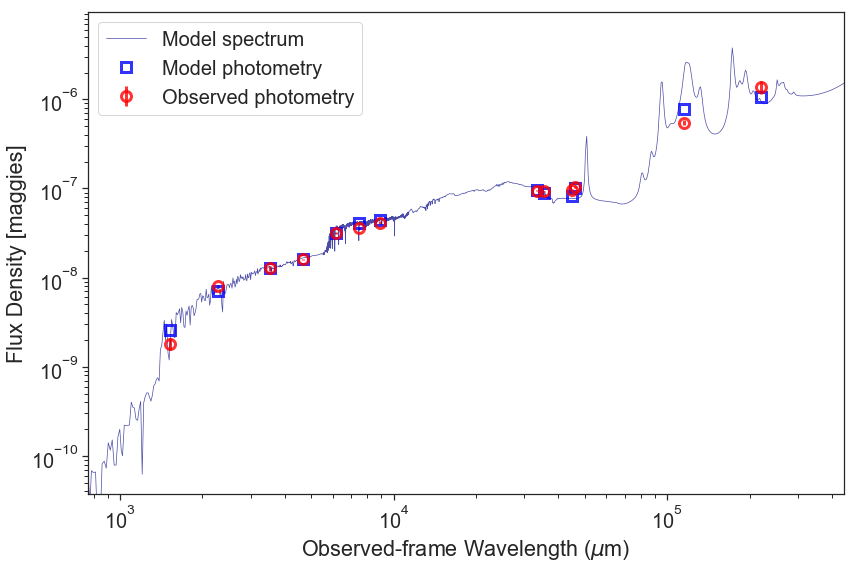

In [13]:
qa_sed(theta_best, model, obs, sps)

In [ ]:
wspec

In [ ]:
stop

In [ ]:
# Generate the model SED at some value of theta
theta = model.theta.copy()
theta[model.theta_index["mass"]] = 1e8
initial_spec, initial_phot, initial_mfrac = model.sed(theta, obs=obs, sps=sps)
# spec, phot, x = sps.get_spectrum(outwave=obs['wavelength'], filters=obs["filters"], **model.params)
title_text = ','.join(["{}={}".format(p, model.params[p][0]) for p in model.free_params])

a = 1.0 + model.params.get('zred', 0.0) # cosmological redshifting
# photometric effective wavelengths
wphot = obs["phot_wave"]
# spectroscopic wavelengths
if obs["wavelength"] is None:
    # *restframe* spectral wavelengths, since obs["wavelength"] is None
    wspec = sps.wavelengths
    wspec *= a #redshift them
else:
    wspec = obs["wavelength"]

# establish bounds
xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
ymin, ymax = temp.min()*0.8, temp.max()/0.4
figure(figsize=(16,8))

# plot model + data
loglog(wspec, initial_spec, label='Model spectrum', 
       lw=0.7, color='navy', alpha=0.7)
errorbar(wphot, initial_phot, label='Model photometry', 
         marker='s',markersize=10, alpha=0.8, ls='', lw=3,
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry',
         marker='o', markersize=10, alpha=0.8, ls='', lw=3,
         ecolor='red', markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)
title(title_text)

# plot Filters
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    while t.max() > 1:
        t /= 10.
    t = 0.1*(ymax-ymin)*t + ymin
    loglog(w, t, lw=3, color='gray', alpha=0.7)

# prettify
xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
legend(loc='best', fontsize=20)
tight_layout()